# 1. Dot Product

Write a function `matrix_multiply(A, B)` using for loops, `+` and `*` that takes in two matrices (can be list of lists, or 2d numpy array) and returns their dot product (matrix multiplication). It should work with column vectors ($k \times 1$ dimensions) and row vectors ($1 \times k$) normally.


```import numpy as np

A = [
    [1,2,3],
    [4,5,6]
]

B = [
    [1,2,3],
    [4,5,6],
    [7,8,9]
]

matrix_multiply(A,B)

RETURNS: 
[[30, 36, 42],
 [66, 81, 96]]

---------example 2-------------
# This is a row vector
A = np.array([
    [1,2,3]
])

# This is a column vector
B = np.array([
    [1],
    [4],
    [7]
])

matrix_multiply(A,B)

RETURNS:
[[30]]

```

Use `np.dot` to test your output

In [1]:
import numpy as np
def matrix_multiply(A,B):
    Amatrix=np.array(A)
    Bmatrix=np.array(B)
    res=np.zeros((Amatrix.shape[0],Bmatrix.shape[1]))

    for i in range(res.shape[0]):
        for j in range(res.shape[1]):
            res[i,j]=np.sum(Amatrix[i]*Bmatrix[:,j])
    print(res)
            
A = np.array([[1,2,3]])
B = np.array([[1],[4],[7]])

A1 = [ [1,2,3], [4,5,6] ]
B1 = [ [1,2,3], [4,5,6], [7,8,9] ]
matrix_multiply(A1,B1)

[[30. 36. 42.]
 [66. 81. 96.]]


# 2 Matrix Math torture

**2.1** Give a 3 examples of non-invertible square matrices that are non-zero

**2.2** Explain why the identity matrix $I$ is necessarily a square matrix with only $1$'s on the diagonal (hint: use the dot product from Q1)

**2.3** The **trace** is commutative for two matrices so $tr(AB) = tr(BA)$. Give an example where this is false for 3 matrices which can all be multiplied together.

**2.4** Give an example of a nonzero $4 \times 4$ idempotent matrix (where $A \cdot A = A^2 = A$)

**2.5** solve the following system of equations for `x`, `y` and `z` using matrices and `numpy.linalg.solve`

$$x 	+ 	y 	+ 	z 	= 	6$$

  	  	$$2y 	+ 	5z 	= 	−4$$

$$2x 	+ 	5y 	− 	z 	= 	27$$

2.1
[[10,20],
[250,500]]

[[3,15],[60,150]]

[[2,10],[24,120]]

2.2
You get back the same matrix.

A = [[a,b],[c,d]]
I = [[1,0],[0,1]]
AI = A 
(a*1+b*0), (a*0+b*1), (c*1+d*0), (c*0+d*1)
A**(-1)A = I

In [2]:
#2.3 
m1=np.array([[4,-2,-1],[12,1,-3],[2,5,9]])

m2=np.array([[4,8,-1],[12,4,-3],[4,6,8]])

m3=np.array([[4,5,-1],[1,6,-3],[2,3,7]])
tr1=np.dot(np.dot(m1,m2),m3)
np.trace(tr1)
tr2=np.dot(np.dot(m1,m3),m2)
np.trace(tr2),np.trace(tr1)

(580, 584)

#2.3
[[7, 1, 6, 0],
       [1, 3, 9, 2],
       [6, 4, 1, 8],
       [4, 5, 5, 6]]

In [3]:
#2.4
p=np.eye(4)
np.dot(p,p)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

2.4
[[4,-1],[12, -3]]

In [4]:
#2.5
import numpy as np
a=np.array([[1,1,1],[0,2,5],[2,5,-1]])
b=np.array([[6],[-4],[27]])
x=np.linalg.solve(a,b)
print(x)

[[ 5.]
 [ 3.]
 [-2.]]


# 3.1 Boston regression

Using statsmodels and the `boston` dataset, make a regression model to predict house prices. Don't forget to add a constant (intercept) term. Note that statsmodels can take a `pd.DataFrame` as an input for `X`.

Report the $R^2$ and coefficients on each feature

In [5]:
#importing a bunch of libraries

import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [6]:
boston = pd.DataFrame(load_boston().data,columns = load_boston().feature_names)
y = load_boston().target
X =sm.add_constant(boston)
test = sm.OLS(y,X).fit().summary()
test

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 17 Jan 2021   Prob (F-statistic):          6.72e-135
Time:                        19:47:52   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 3.2 Polynomial features

Use polynomial features to improve your regression model in `3.1`. You can use squared and cubic features. Try to find a model that minimizes the `AIC` or `BIC` of your output table.

In [7]:
#dropping 2 columns as the p value is more than 0.05
boston1 = boston.drop(['INDUS','AGE'],axis=1)

#modifying the df
boston2 = boston1.apply(np.square)
boston2.columns=boston1.columns+"-SQ"
y = load_boston().target

#concatenating 2 dfs
boston3=pd.concat((boston1,boston2),axis=1)

X =sm.add_constant(boston3)
test1 = sm.OLS(y,X).fit().summary()
test1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     113.1
Date:                Sun, 17 Jan 2021   Prob (F-statistic):          1.68e-171
Time:                        19:47:57   Log-Likelihood:                -1390.8
No. Observations:                 506   AIC:                             2826.
Df Residuals:                     484   BIC:                             2919.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        159.6947     20.937      7.627      0.000     118.555     200.834
CRIM          -0.3781      0.084     -4.501      0.000      -0.543      -0.213
ZN            -0.0548      0.031     -1.768      0.078      -0.116       0.006
CHAS           1.2774      0.353      3.618      0.000       0.584       1.971
NOX          -20.0442     24.024     -0.834      0.404     -67.248      27.159
RM           -18.9023      2.769     -6.826      0.000     -24.343     -13.462
DIS           -2.7605      0.524     -5.272      0.000      -3.789      -1.732
RAD            0.5761      0.208      2.770      0.006       0.168       0.985
TAX           -0.0338      0.012     -2.906      0.004      -0.057      -0.011
PTRATIO       -5.2317      1.655     -3.161      0.002      -8.484      -1.979
B              0.0242      0.011      2.221      0.027       0.003       0.046
LSTAT         -1.3351      0.119    -11.204      0.000      -1.569      -1.101
CRIM-SQ        0.0030      0.001      2.789      0.005       0.001       0.005
ZN-SQ          0.0007      0.000      2.106      0.036    4.82e-05       0.001
CHAS-SQ        1.2774      0.353      3.618      0.000       0.584       1.971
NOX-SQ        -2.0339     17.676     -0.115      0.908     -36.764      32.697
RM-SQ          1.7218      0.216      7.963      0.000       1.297       2.147
DIS-SQ         0.1526      0.043      3.522      0.000       0.067       0.238
RAD-SQ        -0.0100      0.008     -1.208      0.228      -0.026       0.006
TAX-SQ      2.753e-05   1.46e-05      1.890      0.059   -1.09e-06    5.61e-05
PTRATIO-SQ     0.1252      0.047      2.676      0.008       0.033       0.217
B-SQ       -4.083e-05    2.4e-05     -1.704      0.089   -8.79e-05    6.24e-06
LSTAT-SQ       0.0232      0.003      7.028      0.000       0.017       0.030
==============================================================================
Omnibus:                      153.702   Durbin-Watson:                   1.194
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2589.512
Skew:                           0.845   Prob(JB):                         0.00
Kurtosis:                      13.953   Cond. No.                     5.88e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.07e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# 3.3 Feature plotting

Now that you have a better model, make a regression figure plot for the important feature. The regression plot should be like the ones made at the end of part 3 of this lecture (scatterplot + regression line). It should have the following:

- Have the `x` axis be the values from one of your important features. The values should range from the `[min, max]` of the observed values in the dataset.

- The y axis on each chart is the target value (house price)

- You should have a scatter plot of the datapoints for the feature + the regression line of predicted values on each

- If you used non-linearities (squared and/or cube input) the regression curve should be nonlinear as well

- When plotting values for a single variable, you can set all the other values to their `mean` or `median` when you put them in your model's prediction

In [8]:
#importing more libraries just so I can work section by section
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC

In [9]:
#defining my variables
boston = boston.sort_values(by='LSTAT')
X1 = boston['CRIM']
X1 = X1.values.reshape(-1,1)
y = load_boston().target

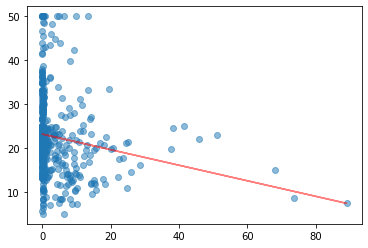

In [10]:
#using linear regression and plotting a graph
X1 = sm.add_constant(X1)

model = sm.OLS(y,X1).fit()

prediction = model.predict(X1)

fig, ax = plt.subplots()
ax.plot(X1[:,1],prediction,alpha=0.5,color='r')
ax.scatter(X1[:,1],y,alpha=0.5)
plt.show()

In [11]:
#maniputing dataframes 
bruins = pd.DataFrame(load_boston().data,columns = load_boston().feature_names)
bruins['MEDV'] = load_boston().target

bruins1 = bruins.drop(['INDUS','AGE'],axis=1)
bruins2 = bruins1.apply(np.square)
bruins2.columns=bruins1.columns+"-SQ"

bruins3=pd.concat((bruins1,bruins2),axis=1)
bruins3

,CRIM,ZN,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,...,CHAS-SQ,NOX-SQ,RM-SQ,DIS-SQ,RAD-SQ,TAX-SQ,PTRATIO-SQ,B-SQ,LSTAT-SQ,MEDV-SQ
0,0.00632,18.0,0.0,0.538,6.575,4.0900,1.0,296.0,15.3,396.90,...,0.0,0.289444,43.230625,16.728100,1.0,87616.0,234.09,157529.6100,24.8004,576.00
1,0.02731,0.0,0.0,0.469,6.421,4.9671,2.0,242.0,17.8,396.90,...,0.0,0.219961,41.229241,24.672082,4.0,58564.0,316.84,157529.6100,83.5396,466.56
2,0.02729,0.0,0.0,0.469,7.185,4.9671,2.0,242.0,17.8,392.83,...,0.0,0.219961,51.624225,24.672082,4.0,58564.0,316.84,154315.4089,16.2409,1204.09
3,0.03237,0.0,0.0,0.458,6.998,6.0622,3.0,222.0,18.7,394.63,...,0.0,0.209764,48.972004,36.750269,9.0,49284.0,349.69,155732.8369,8.6436,1115.56
4,0.06905,0.0,0.0,0.458,7.147,6.0622,3.0,222.0,18.7,396.90,...,0.0,0.209764,51.079609,36.750269,9.0,49284.0,349.69,157529.6100,28.4089,1310.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,0.0,0.573,6.593,2.4786,1.0,273.0,21.0,391.99,...,0.0,0.328329,43.467649,6.143458,1.0,74529.0,441.00,153656.1601,93.5089,501.76
502,0.04527,0.0,0.0,0.573,6.120,2.2875,1.0,273.0,21.0,396.90,...,0.0,0.328329,37.454400,5.232656,1.0,74529.0,441.00,157529.6100,82.4464,424.36
503,0.06076,0.0,0.0,0.573,6.976,2.1675,1.0,273.0,21.0,396.90,...,0.0,0.328329,48.664576,4.698056,1.0,74529.0,441.00,157529.6100,31.8096,571.21
504,0.10959,0.0,0.0,0.573,6.794,2.3889,1.0,273.0,21.0,393.45,...,0.0,0.328329,46.158436,5.706843,1.0,74529.0,441.00,154802.9025,41.9904,484.00


In [12]:
#defining my variables
bruins3=bruins3.sort_values(by='LSTAT')
X2 = bruins3[['LSTAT','LSTAT-SQ']]
y1 = bruins3['MEDV']

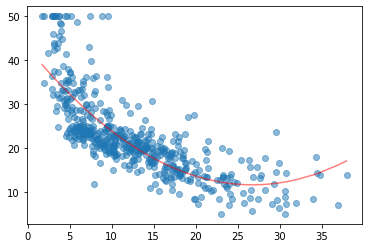

In [13]:
#plotting the graph
X2 = sm.add_constant(X2)
model1 = sm.OLS(y1,X2).fit()
prediction1 = model1.predict(X2)

fig1, ax1 = plt.subplots()
ax1.plot(bruins3['LSTAT'],prediction1,alpha=0.5,color='r')
ax1.scatter(bruins3['LSTAT'],y1,alpha=0.5)
plt.show()

# 3.4 Multi-feature plotting

Make a single matplotlib `figure` object with the same chart as in **2.4** but with 4 charts instead for your 4 most important features. 

Do not copy-paste code for each feature you visualize in the plot. Extract your code into a function so you can just have something like

```python
fix, ax1, ax2, ax3, ax4 = plt.subplots((2,2))
reg_plot_on_ax(feature_1, ax1)
reg_plot_on_ax(feature_2, ax2)
reg_plot_on_ax(feature_3, ax3)
reg_plot_on_ax(feature_4, ax4)
```

In [14]:
#choosing my 4 features
bruins.corr()['MEDV'].sort_values(ascending=False)[1:5].index

Index(['RM', 'ZN', 'B', 'DIS'], dtype='object')

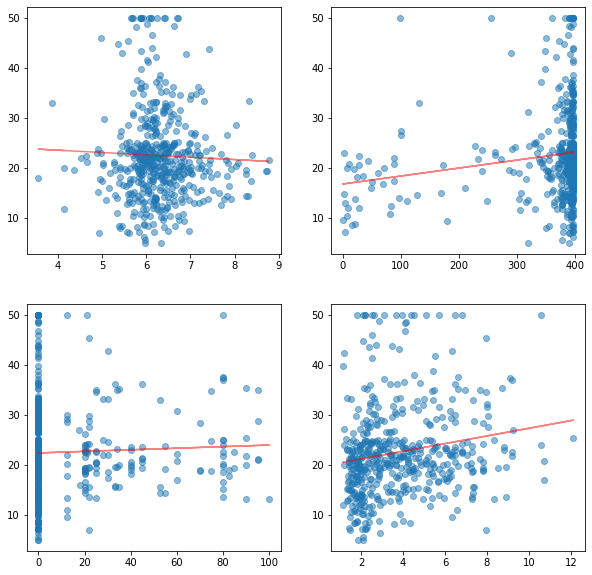

In [15]:
#creating a function
def reg_plot_on_ax(feature,ax):
    
    if feature in boston.columns:
        x = boston[feature]
        x = x.values.reshape(-1,1)
        x = sm.add_constant(x)
        Y = load_boston().target
        
        model = sm.OLS(Y,x).fit()
        
        prediction = model.predict(x)

        ax.plot(x[:,1],prediction,alpha=0.5,color='r')
        ax.scatter(x[:,1],Y,alpha=0.5)
#plotting the graph
fig, ax = plt.subplots(2,2,figsize=(10,10))
reg_plot_on_ax('RM',ax[0,0])
reg_plot_on_ax('B',ax[0,1])
reg_plot_on_ax('ZN',ax[1,0])
reg_plot_on_ax('DIS',ax[1,1])